<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv(r'penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The data is about three species of penguins(Chinstrap, Gentoo and Adélie) that habitate the Palmer Archipelago in Antartica.
the dataset has information on location, culmen length, culmen depth, flipper lenght, body mass and sex of 344 penguins.

In [4]:
data.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [5]:
data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [6]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
 7   sp_adelie          334 non-null    float64
 8   sp_chinstrap       334 non-null    float64
 9   sp_gentoo          334 non-null    float64
 10  island_biscoe      334 non-null    float64
 11  island_dream       334 non-null    float64
 12  island_torgersen   334 non-null    float64
 13  male               334 non-null    float64
 14  female             334 non-null    float64
dtypes: float64(12), object(3)
memory usage: 41.8+ KB


In [7]:
data.count()

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  334
dtype: int64

In [8]:
data.isnull().sum().sort_values()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
data = data.dropna()
data.isnull().sum().sort_values()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
data.count()

species              334
island               334
culmen_length_mm     334
culmen_depth_mm      334
flipper_length_mm    334
body_mass_g          334
sex                  334
dtype: int64

# 2. Objectives


Find relations between body mass and other characteristics of penguins in the dataset

Being able to predict sex, wich island the penguin lives on or species based on the dataframe

# 3. Data Cleaning


In [11]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
ohe = OneHotEncoder()

In [13]:
species_encoded = ohe.fit_transform(data[['species']])

In [14]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()
le = LabelEncoder()
ohc = OneHotEncoder()
data_ohc = data
for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data = pd.concat([data, new_df], axis=1)

C:\Users\borge\AppData\Local\Temp\ipykernel_10368\3326622751.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.object
C:\Users\borge\AppData\Local\Temp\ipykernel_10368\3326622751.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc[

In [15]:
data = data.drop('sex_0', axis=1)
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_0,species_1,species_2,island_0,island_1,island_2,sex_1,sex_2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [16]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_0,species_1,species_2,island_0,island_1,island_2,sex_1,sex_2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [17]:
#sp0: Adelie, sp1: Chinstrap, sp2: Gentoo
#island0:Biscoe, island1: Dream, island2: Biscoe
#sex1:male, sex2: female
data.rename(columns ={'species_0':'sp_adelie'},inplace=True)
data.rename(columns ={'species_1':'sp_chinstrap'},inplace=True)
data.rename(columns ={'species_2':'sp_gentoo'}, inplace=True)
data.rename(columns ={'island_0':'island_biscoe'}, inplace=True)
data.rename(columns ={'island_1':'island_dream'}, inplace=True)
data.rename(columns ={'island_2':'island_torgersen'}, inplace=True)
data.rename(columns ={'sex_1':'male'}, inplace=True)
data.rename(columns ={'sex_2':'female'}, inplace=True)

In [35]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sp_adelie,sp_chinstrap,sp_gentoo,island_biscoe,island_dream,island_torgersen,male,female
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


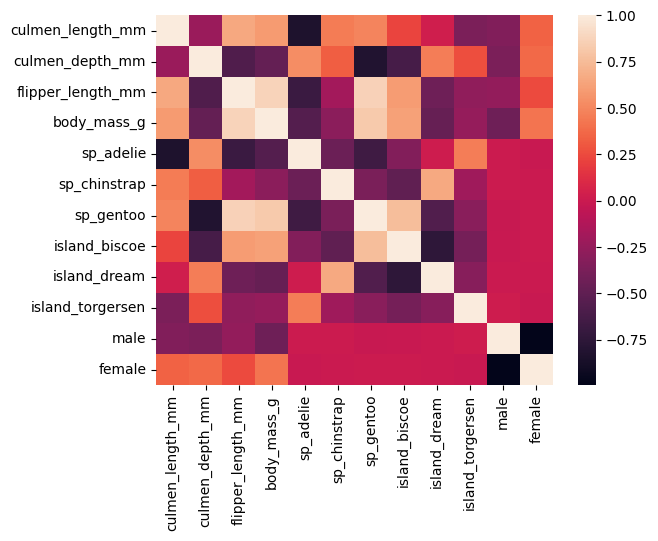

In [18]:
dataplot=sns.heatmap(data.corr())
plt.show()

# 4. Regression models

In [52]:
lrdataset = data.drop(['species', 'island', 'sex'], axis=1)
lrdataset = np.log1p(lrdataset)

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
def scale_numerical(lrdataset):
 scaler = MinMaxScaler()
 lrdataset[lrdataset.columns] = scaler.fit_transform(data[data.columns])

Linear Regression

In [81]:

lr = LinearRegression()
X = lrdataset.drop('body_mass_g', axis=1)
y = lrdataset['body_mass_g']
X_ss = std_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=72018)


In [82]:
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
r2_score(lr_pred,y_test)
print("R^2 on training  data ",lr.score(X_train, y_train))
print("R^2 on testing data ",lr.score(X_test,y_test))
print("MSE ", mean_squared_error(y_test, lr_pred))

R^2 on training  data  0.8459975947309006
R^2 on testing data  0.8930265045694742
MSE  0.004580395339109464


Polynomial effects

In [74]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_train_poly)
print("R^2 on training data:", lr.score(X_train_poly, y_train))
print("R^2 on testing data:", lr.score(X_test_poly,y_test))

R^2 on training data: 0.8872068311074288
R^2 on testing data: 0.7133459437892644


KMEANS

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(X_train)
y_pred = k_means.predict(X_test)
r2_score(y_test, y_pred)

-1012.1998654160293

Lasso

In [76]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    la=Lasso(alpha=alpha)
    
    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))

print("R^2 on training  data ",la.score(X_train, y_train))
print("R^2 on testing data ",la.score(X_test,y_test))


R^2 on training  data  0.0
R^2 on testing data  -0.02313509873838271


In [77]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
la = Lasso(alpha=alpha)
la.fit(X_train, y_train)
y_pred_la = la.predict(X_test)
print("R^2 on training  data ",la.score(X_train, y_train))
print("R^2 on testing data ",la.score(X_test,y_test))

R^2 on training  data  0.0
R^2 on testing data  -0.02313509873838271


Ridge


In [79]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
print("R^2 on training  data ",rr.score(X_train, y_train))
print("R^2 on testing data ",rr.score(X_test,y_test))
print("MSE ", mean_squared_error(y_test, y_pred_rr))

R^2 on training  data  0.8459975866879997
R^2 on testing data  0.8930217927701206
MSE  0.004580597089119699


In [83]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     146.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           3.10e-92
Time:                        16:29:11   Log-Likelihood:                 306.97
No. Observations:                 250   AIC:                            -593.9
Df Residuals:                     240   BIC:                            -558.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5391      0.68

# 4. Insights and key findings


The Ridge regression model seems to have the better R^2 value on both training and test sets meaning this would be the recommended model based on this data.

By analyzing the OLS Summary we can infer that many of the variables don't have a significative statistical significance (p<0.05).


# 5. Next Steps


It would be good as a next step to test other models like Tree, forest or Kmean.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
